In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

from matplotlib.animation import FuncAnimation

In [2]:
vp = 0.1                         # The phase-velocity of the wave, taken to be 0.1 ms^{-1}
times = np.linspace(0,4/vp,1000) # Take 1000 time-steps between 0 and T = 4/vp seconds
x = np.linspace(0,1,100)         # Array of positions between 0 and 1, in 100 steps

In [3]:
def An(n):
    if(n==2):      # The Fourier coefficient seems to blow up when n=2,
        return 0.5 # but if you take the limit carefully, it turns out to be 1/2
    else:
        return -(1/np.pi)*np.sin(n*np.pi/2)*4/(n**2 - 4) # Otherwise, return the full coefficient

In [4]:
# Function to plot the string profile at some instant $t=0$
def sum_nTerms(x,t=0,nTerms=100,vp=vp, color='firebrick', return_plot=False):
    # This function plots the sum of the first n terms of the Fourier expansion
    # Notice how the function has some default arguments already defined. 
    # Having such ``default'' values is a useful technique. For example, the same function
    # can be used to either get the displacement at some time, *or* to plot the displacement
    # at some time, depending on whether the `return_plot` variable is set to True.
    
    f = np.zeros_like(x)               # The array that will contain the displacement profile at some time t

    # f is initially zero, and we keep adding as many terms to it as required.
    for i in range(nTerms):
        f = f + An(i)*np.sin(i*np.pi*x)*np.cos(vp*i*np.pi*t)

    if(return_plot): # If return_plot == True, plot f against t
        plt.plot(x,f, label="Sum of "+str(nTerms)+ " terms", color=color)
        plt.xlabel("Position on string")
        plt.ylabel("Displacement")
    
    return f

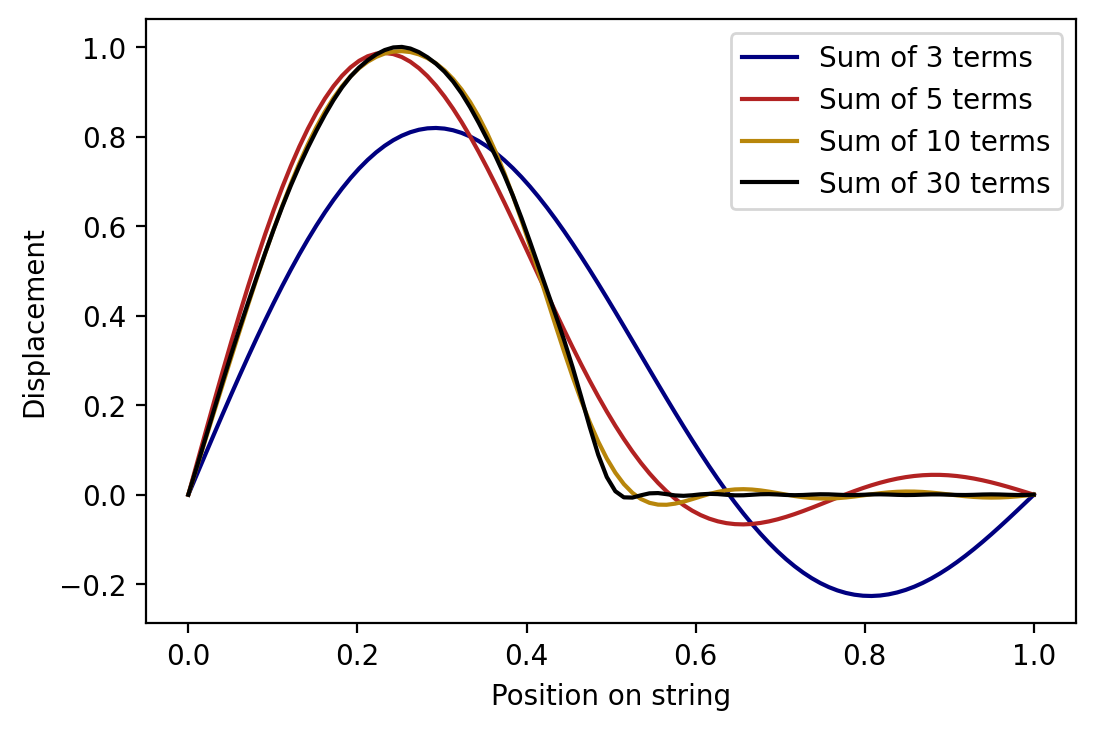

In [5]:
# Plotting the static string
sum_nTerms(x,nTerms=3, return_plot=True,color='navy')
sum_nTerms(x,nTerms=5, return_plot=True,color='firebrick')
sum_nTerms(x,nTerms=10,return_plot=True, color='darkgoldenrod')
sum_nTerms(x,nTerms=30,return_plot=True, color='black')
plt.legend()
# plt.savefig("ds6_sine_plucked_string_series_sum.png",dpi=200)

In [6]:
# This section of the code creates a 2 dimensional array u[][] which contains the solution at different locations and different steps of time.
u = np.zeros((len(times),len(x))) # u[i][j] described the position of the `j`th point (x[j]), at the `i`th time-step (t[i]).

# We will now fill in this array u[i][j] with the results from the `sum_nTerms` function
for i in range(len(times)): # For every time-step
    u[i] = sum_nTerms(x, t=times[i])

In [7]:
# Function to return an animation, given a 2D array like u[i][j] that we have created.
# Notice how I have defined many default options that can be used to download the animation as a video
def animate(array, save_animation=False, save_name='video.mp4', save_dpi=300, save_fps=100):
    
    fig, ax = plt.subplots()                    # Define a figure and an axes. axes works just like plt, i.e. you can just do ax.plot, etc.
    
    graph, = ax.plot([], [], color='firebrick',lw=3) # Define an ``empty'' plot, we will be dynamically changing the data in this plot
    
    def init():                                                           # Initialise the whole plot
        ax.set_xlim(0,1)                            # Setting the x and y limits of the plot
        ax.set_ylim(-1,1)
    
        ax.tick_params(top=False, bottom=False, left=False, right=False,  # Remove all axes (they're unnecessary here)
                       labelleft=False, labelbottom=False)
        return ax

    def animate(frame):                 # For frame number `frame',
        ydata = array[frame]            # for every time-step, get the string's position data, and
        graph.set_data(x, ydata)        # plot the current position data against x (i.e., set the data for the graph object)
        return graph                    

    # Most important line, this is what actually handles the animation by calling the `animate' function with a frame number (integer)
    ani = FuncAnimation(fig, animate, init_func=init, blit=True, frames=1000, interval=20, repeat=True)   # Code to create animations
    
    if(save_animation):                                  # If you wish to save the animation, do so with the dpi and fps set here 
        ani.save(save_name, dpi=save_dpi, fps=save_fps)

    return ani                                           # When calling this FuncAnimation function from with a code, all the information that update the window 
                                                         # are attributes of the object ani. If you do not keep a reference to it around, then ani is garbage collected 
                                                         # all information about the graphs disappears when calling from within a function. You don't need this when you call 
                                                         # aren't calling the animation from within a function.

<IPython.core.display.Javascript object>


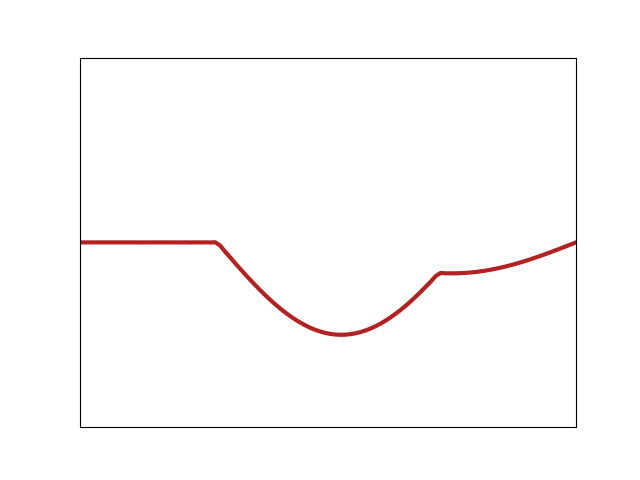

In [8]:
%matplotlib notebook
animate(u)